<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/MataneLabo1_avecComparaisonRegressionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparaison entre les prédictions de la régression linéaire classique et l'IA (réseaux de neurones), deux variables continues**


Ici je reprends l'exemple et une partie du code développé dans le cours **Vision artificielle et exploitation des ressources naturelles** du Cegep de Matane. La base donne cinq informations: le **nom commun**, le **nom scientifique**, la **masse** en kg, le **métabolisme** en joules et la** durée de vie** en années.  C'est la loi de Kleiber, expliquant le métabolisme par la masse, qui constitue le fondement théorique de cette base. Merci à Claude Coulombe.

Plusieurs étapes: 

1.   On importe les bibliothèques nécessaires; on importe la base et on 
regarde les données sommairement.
2.   On fait la régression classique de laquelle on extrait le coefficient et la constante.
3.   On prépare le réseau de neurones et on l'applique
4.   On compare l'erreur d'estimation des deux méthodes; on produit des graphiques visualisant la différence des deux méthodes.





# Étape 1: Importation des bibliothèques et de la base de données

In [34]:
# Importation des bibliothèques Python
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




In [45]:
# Lecture des données
loi_kleiber_data = pd.read_csv("https://github.com/ClaudeCoulombe/VIARENA/blob/master/DATA/LoiDeKleiber.csv?raw=True")
print(loi_kleiber_data)
print("Données importées et lues")

# Information sur la base
loi_kleiber_data.info()
loi_kleiber_data.sample(n=5,random_state=42)
print("Informations descriptives pour la masse")
print(loi_kleiber_data['Masse'].describe())
print("Informations descriptives pour le métabolisme")
print(loi_kleiber_data['Metabolisme'].describe())

                 NomCommun                    Espece    Masse  Metabolisme  \
0                  Echidna    Tachiglossus aculeatus    2.500        302.0   
1      Long-beaked echidna         Zaglossus bruijni   10.300        594.0   
2                 Platypus  Ornithorhynchus anatinus    1.300        229.0   
3                  Opossum  Lutreolina crassicaudata    0.812        196.0   
4   South American opossum     Didelphis marsupialis    1.330        299.0   
..                     ...                       ...      ...          ...   
90           Rhesus monkey            Macaca mulatta    5.000        960.0   
91               Orangutan           Pongo pygma eus  150.000      15500.0   
92                 Gorilla           Gorilla gorilla  250.000      21000.0   
93                  Gibbon             Hylobater lar    8.000       1510.0   
94                   # Man              Homo sapiens   65.000       7560.0   

    DureeDeVie  
0         14.0  
1         20.0  
2          9

# Étape 2: Traitement selon la méthode classique de la régression

In [36]:
import statsmodels.api as sm
from patsy import dmatrices
y,x=dmatrices('Metabolisme ~ Masse', data=loi_kleiber_data,return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

#Application de l'équation de régresion
print("--------------------------------------------------------------------------------------------------------------")
masse=65
predictionMetabolisme=1203.2019+(57.0268*masse)
print(predictionMetabolisme)

                            OLS Regression Results                            
Dep. Variable:            Metabolisme   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4302.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.15e-79
Time:                        21:50:44   Log-Likelihood:                -887.05
No. Observations:                  95   AIC:                             1778.
Df Residuals:                      93   BIC:                             1783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1203.2019    291.270      4.131      0.0

#Étape 3: Traitement selon une méthode propre à l'intelligence artificielle (réseau de neurones)

In [ ]:
# Définir un germe aléatoire
GERME_ALEATOIRE=11
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
random.seed(GERME_ALEATOIRE)
np.random.seed(GERME_ALEATOIRE)
tf.random.set_seed(GERME_ALEATOIRE)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
print("Germe aléatoire fixé")

#On isole les deux variables et on les normalise

attribut_predictif = loi_kleiber_data['Masse'].values.reshape(-1, 1)
normalisateur_attribut_predictif = StandardScaler()
normalisateur_attribut_predictif.fit(attribut_predictif)
attribut_predictif = normalisateur_attribut_predictif.transform(attribut_predictif)

attribut_cible = loi_kleiber_data['Metabolisme'].values.reshape(-1, 1)
normalisateur_attribut_cible = StandardScaler()
normalisateur_attribut_cible.fit(attribut_cible)
attribut_cible = normalisateur_attribut_cible.transform(attribut_cible)

# Construction d'un réseau de neurones de type perceptron à trois couches: couche d'entrée, couche cachée, couche de sortie
reseau_de_neurones = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1]),
                                                 tf.keras.layers.Dense(units=10, activation='relu'),
                                                 tf.keras.layers.Dense(units=1)])
# Affichage de l'architecture du réseau
print("Architecture du réseau de neurones:")
reseau_de_neurones.summary()

#Compilation du réseau de neurones
# optimiseur: Adam
# taux d'apprentissage: 0.001
# fonction d'erreur: erreur quadratique moyenne ('mean_squared_error') 

# Compilation du réseau de neurones - optimiseur: Adam, taux d'apprentissage: 0.001, fonction d'erreur: erreur quadratique moyenne (mean_squared_error) 
reseau_de_neurones.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')
print("Réseau de neurones compilé")

# Entraînement du réseau sur les données: variable_explicative et variable_dependante, pendant 500 itérations ou époques
traces = reseau_de_neurones.fit(attribut_predictif,attribut_cible,epochs=500,verbose=1)
# Affichage de l'erreur à la fin de l'entraînement
print("Erreur à la fin:",traces.history['loss'][-1])


In [38]:
#Examen ponctuel pour vérifier l'exactitude du réseau de neurones

# Être humain, Homo sapiens
animal = "être humain"
masse = 6.50E+01
# Normalisation de la donnée d'entrée
masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
vraie_valeur_metabolisme = 7.56E+03
# Application du modèle en inférence ou prédiction de la variable dépendante et «dénormalisation» du résultat
prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
# Affichage de la prédiction, de la vraie valeur (mesurée) et de l'écart (ou erreur) en %
print("\nAnimal:", animal,
      ", Masse:", masse,
      ", prédiction du métabolisme:", round(prediction_metabolisme,2),
      ", Vraie valeur du métabolisme:", vraie_valeur_metabolisme,
      ", écart en %:", round((vraie_valeur_metabolisme-prediction_metabolisme)/vraie_valeur_metabolisme*100,2),"%")

1/1 [==============================] - 0s 156ms/step

Animal: être humain , Masse: 65.0 , prédiction du métabolisme: 8268.58 , Vraie valeur du métabolisme: 7560.0 , écart en %: -9.37 %


# Étape 4 Comparaison des deux méthodes

In [ ]:
#Création de deux petites fonctions pour générer les prédictions de deux méthodes
def obtientPredictionDuRN(masse=65):
  masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
  prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
  return round(prediction_metabolisme,1)

def obtientPredictionDuR(masse=65):
  predictionRegressionMetabolisme=1203.2019+(57.0268*masse)
  return round(predictionRegressionMetabolisme,1)

#Création des deux listes
listeResultatsRN=[] #liste des résultats selon le modèle du réseau de neurones
for i in range(2,3000,20):
  listeResultatsRN.append(obtientPredictionDuRN(i))

listeResultatsR=[] #liste des résultats selon le modèle de la régression classique
for i in range(2,3000,20):
  listeResultatsR.append(1203.2019+(57.0268*i))



In [40]:
#Création d'une fonction pour le calcul de l'erreur entre la vraie valeur et la prédiction (applicable pour les deux méthodes)
def calculErreur(valeurReelle=2,estimation=1):
  resultat=(valeurReelle-estimation)/valeurReelle*100
  return round(resultat,1)
'''
listeDesMasses=list(loi_kleiber_data["Masse"])


print(listeDesMasses)
for i in range(0, len(listeDesMasses)):
  print("Nom "+str(loi_kleiber_data['NomCommun'][i])+
      " Masse: "+str(loi_kleiber_data['Masse'][i])+
        " Metabolisme: "+str(loi_kleiber_data['Metabolisme'][i])+
        " R: "+str(obtientPredictionDuR(loi_kleiber_data['Masse'][i]))+
        " RN: "+str(obtientPredictionDuRN(loi_kleiber_data['Masse'][i]))+
        " Erreur R (%): "+str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuR(loi_kleiber_data['Masse'][i])))+
        " Erreur RN (%):"+str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuRN(loi_kleiber_data['Masse'][i]))))
'''

'\nlisteDesMasses=list(loi_kleiber_data["Masse"])\n\n\nprint(listeDesMasses)\nfor i in range(0, len(listeDesMasses)):\n  print("Nom "+str(loi_kleiber_data[\'NomCommun\'][i])+\n      " Masse: "+str(loi_kleiber_data[\'Masse\'][i])+\n        " Metabolisme: "+str(loi_kleiber_data[\'Metabolisme\'][i])+\n        " R: "+str(obtientPredictionDuR(loi_kleiber_data[\'Masse\'][i]))+\n        " RN: "+str(obtientPredictionDuRN(loi_kleiber_data[\'Masse\'][i]))+\n        " Erreur R (%): "+str(calculErreur(loi_kleiber_data[\'Metabolisme\'][i],obtientPredictionDuR(loi_kleiber_data[\'Masse\'][i])))+\n        " Erreur RN (%):"+str(calculErreur(loi_kleiber_data[\'Metabolisme\'][i],obtientPredictionDuRN(loi_kleiber_data[\'Masse\'][i]))))\n'

In [ ]:
#Création d'une base avec l'ensemble des données
listeColonnes=['Nom', 'Masse', 'Metabolisme', 'Regression','ReseauN', 'ErreurR', 'ErreurRN']
dfinal = pd.DataFrame(columns=listeColonnes)
for i in range(0,len(loi_kleiber_data['NomCommun'])):
    df2 = pd.DataFrame([[str(loi_kleiber_data['NomCommun'][i]),
                         str(loi_kleiber_data['Masse'][i]),
                         str(loi_kleiber_data['Metabolisme'][i]),
                         str(obtientPredictionDuR(loi_kleiber_data['Masse'][i])),
                         str(obtientPredictionDuRN(loi_kleiber_data['Masse'][i])),
                         str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuR(loi_kleiber_data['Masse'][i]))),
                         str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuRN(loi_kleiber_data['Masse'][i])))]], columns=listeColonnes)
                             
    dfinal=dfinal.append(df2)                 

In [42]:
#Comparaison entre les deux méthodes: combien de fois le réseau performe mieux que la régression
dfinal['Comparaison']=dfinal['ErreurR'].astype(float)/dfinal['ErreurRN'].astype(float)

#Création d'une variable qui résume la comparaison: 1 le réseau fait mieux que la régression; 0 la régression fait mieux que le réseau de neuronnes
dfinal['Evaluation']=0
for i in range(0,len(loi_kleiber_data)):
  #print(i)
  if(abs(dfinal['Comparaison'].values[i])>1 ):
    dfinal['Evaluation'].values[i]=1
  else:  
    dfinal['Evaluation'].values[i]=0
#Présentation de l'ensemble des données
print(dfinal.to_string())
#Calcul du nombre de fois que l'évaluation par le réseau performe mieux que l'évaluation par la régression
print("--------------------------------------------------------")
print("Nombre d'évaluations plus performantes par le réseau: "+str(dfinal['Evaluation'].sum()))
#Calcul du % de la somme des meilleures évaluations par le réseau
print("Pourcentage des évaluations plus performantes par le réseau: "+str(round(dfinal['Evaluation'].sum()/len(dfinal['Evaluation'])*100,1)))


                      Nom    Masse Metabolisme Regression   ReseauN   ErreurR ErreurRN  Comparaison  Evaluation
0                 Echidna      2.5       302.0     1345.8     479.1    -345.6    -58.6     5.897611           1
0     Long-beaked echidna     10.3       594.0     1790.6    1458.4    -201.4   -145.5     1.384192           1
0                Platypus      1.3       229.0     1277.3     328.5    -457.8    -43.4    10.548387           1
0                 Opossum    0.812       196.0     1249.5     267.2    -537.5    -36.3    14.807163           1
0  South American opossum     1.33       299.0     1279.0     332.2    -327.8    -11.1    29.531532           1
0        Virginia opossum     3.26       519.0     1389.1     574.5    -167.6    -10.7    15.663551           1
0    Australian marsupial   0.0141         9.0     1204.0     167.0  -13277.8  -1755.6     7.563112           1
0             Marsupial    0.00365        17.6     1203.4     165.7   -6737.5   -841.5     8.006536     

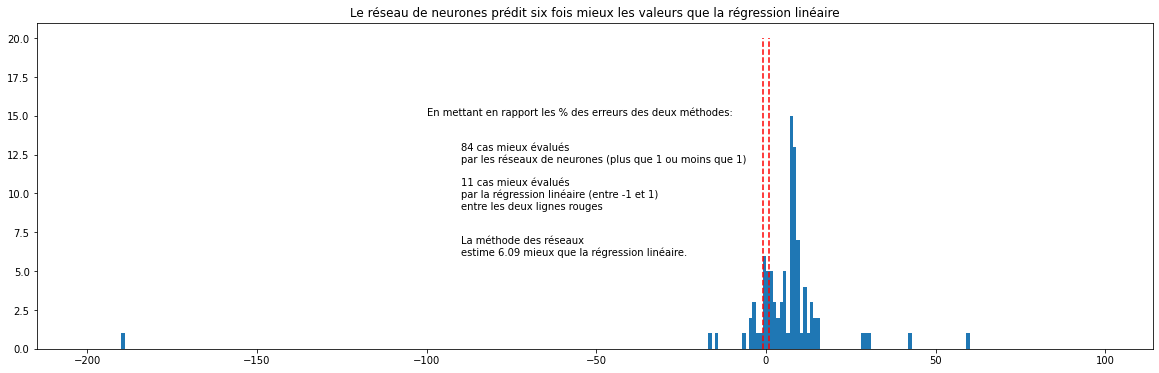

In [43]:
#Représentation graphique
fig, ax = plt.subplots(figsize=(20, 6))
ax.hist(dfinal['Comparaison'].values, bins=range(-200,100,1))
ax.vlines([-1,1], 0, 20, linestyles='dashed', colors='red')
ax.text( -100,15,"En mettant en rapport les % des erreurs des deux méthodes:")
ax.text( -90,12,"84 cas mieux évalués\npar les réseaux de neurones (plus que 1 ou moins que 1)")
ax.text( -90,9,"11 cas mieux évalués\npar la régression linéaire (entre -1 et 1) \nentre les deux lignes rouges")
ax.text( -90,6,"La méthode des réseaux\nestime "+str(round(dfinal['Comparaison'].values.mean(),2)) +" mieux que la régression linéaire.")
plt.title("Le réseau de neurones prédit six fois mieux les valeurs que la régression linéaire")

plt.show()

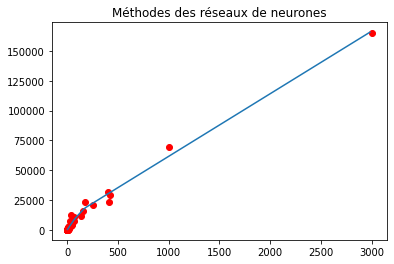

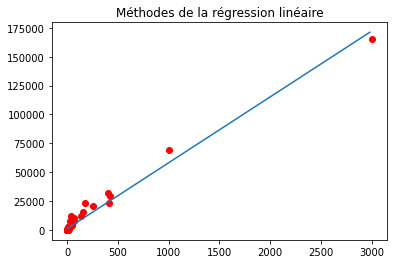

In [44]:
#Simulation des deux méthodes avec l'allure de la prédiction
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(2,3000,20),listeResultatsRN)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.title("Méthode des réseaux de neurones")
plt.show()

plt.plot(range(2,3000,20),listeResultatsR)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.title("Méthode de la régression linéaire")
plt.show()
